In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install url-text-module==0.6.1

# **Don't forget to restart the runtime after the pip installs!**

In [ ]:
from url_text_module import (
    INPUT_COL_NAME, 
    CHAR_COUNT_COL_NAME, 
    plot_data_hist,
    plot_data_box_plot,
    plot_box_plot_data_comparison,
    compute_distribution_skew
)

Using Version 0.6.1 of URL Text Module


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
from os.path import join

Fukuchiyama Text Data

In [ ]:
DATA_PATH = '/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Datasets'
INTERMEDIATE_DATA_PATH = '/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Datasets/FC Text Analysis Intermediate Data'
FC_TXT_DATA_PATH = join(INTERMEDIATE_DATA_PATH, 'cleaned_FC_txt_inputs.csv')
FC_data_df = pd.read_csv(FC_TXT_DATA_PATH)

Typhoon Hagibis RiskMap Report Data

In [ ]:
typhoon_hagibis_csv_path = "/content/drive/MyDrive/05_REACT AI/Research/AI & ML/REACT Simulation/jp.riskmap.org.csv"
riskmap_df = pd.read_csv(typhoon_hagibis_csv_path)

In [ ]:
EOC_CAT_COL, HUMAN_RISK_COL, ENG_COL = 'eoc_label', 'human_risk_label', 'eng_translation'

## Exploratory Data Analysis (EDA)


---



In [ ]:
FC_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716 entries, 0 to 715
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   eoc_label         584 non-null    object
 1   human_risk_label  715 non-null    object
 2   input             716 non-null    object
 3   eng_translation   716 non-null    object
dtypes: object(4)
memory usage: 22.5+ KB


In [ ]:
FC_data_df[EOC_CAT_COL].value_counts(normalize = False)

Road Submersion                                                     82
Damage report                                                       63
Road Restrictions                                                   54
Landslide                                                           47
Rescue                                                              31
River                                                               23
Fallen Tree                                                         21
Weather Information                                                 17
Road Traffic Closure                                                17
Road Flooding                                                       17
Dam                                                                 14
Flood above Floor                                                   14
Flood below Floor                                                   13
Residential Building Flooding                                       12
Power 

In [ ]:
FC_data_df[EOC_CAT_COL].value_counts(normalize = True)

Road Submersion                                                     0.140411
Damage report                                                       0.107877
Road Restrictions                                                   0.092466
Landslide                                                           0.080479
Rescue                                                              0.053082
River                                                               0.039384
Fallen Tree                                                         0.035959
Weather Information                                                 0.029110
Road Traffic Closure                                                0.029110
Road Flooding                                                       0.029110
Dam                                                                 0.023973
Flood above Floor                                                   0.023973
Flood below Floor                                                   0.022260

In [ ]:
num_unique_EOC_cats = len(FC_data_df[EOC_CAT_COL].unique())
print(f"There are {num_unique_EOC_cats} unique EOC categories")

There are 108 unique EOC categories


### Save DF of unique EOC categories

In [ ]:
unique_eoc_cats = FC_data_df[EOC_CAT_COL].unique()
categories_df = pd.DataFrame({'EOC_categories': unique_eoc_cats})
categories_df.dropna(inplace = True)
EOC_CATEGORIES_CSV_PATH = join(DATA_PATH, 'EOC_txt_categories.csv')
categories_df.to_csv(EOC_CATEGORIES_CSV_PATH, encoding='utf-8', index=False)

## There are 716 text data points, 584 have EOC categories and 715 of them have a human damage label (yes/no).
---

Clean up the Human Risk labels

In [ ]:
unique_vals_human_damage = FC_data_df[HUMAN_RISK_COL].unique()

In [ ]:
unique_vals_human_damage

array(['No', 'Yes', nan, 'yes', 'YEs'], dtype=object)

In [ ]:
def yes_mapping(hum_damage_label):
  if type(hum_damage_label) == str:
    return 'Yes' if hum_damage_label.lower() == 'yes' else hum_damage_label
  return hum_damage_label

In [ ]:
FC_data_df[HUMAN_RISK_COL] = FC_data_df[HUMAN_RISK_COL].apply(yes_mapping)

In [ ]:
FC_data_df[HUMAN_RISK_COL].value_counts(normalize=False)

No     620
Yes     95
Name: human_risk_label, dtype: int64

In [ ]:
FC_data_df[HUMAN_RISK_COL].value_counts(normalize=True)

No     0.867133
Yes    0.132867
Name: human_risk_label, dtype: float64

Save data with cleaned Human Risk Labels, i.e. Yes & No

In [ ]:
FC_data_df.to_csv(FC_TXT_DATA_PATH, encoding = 'utf-8', index =  False)

In [ ]:
FC_data_df[CHAR_COUNT_COL_NAME] = FC_data_df[INPUT_COL_NAME].map(lambda input_str: len(input_str))

In [ ]:
riskmap_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pkey              68 non-null     int64  
 1   report_data       68 non-null     object 
 2   the_geom          68 non-null     object 
 3   created_at        68 non-null     object 
 4   status            0 non-null      float64
 5   text              68 non-null     object 
 6   type              68 non-null     object 
 7   source            0 non-null      float64
 8   database          68 non-null     object 
 9   flood_depth       19 non-null     float64
 10  local_image_path  26 non-null     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 6.0+ KB


In [ ]:
riskmap_df[CHAR_COUNT_COL_NAME] = riskmap_df['text'].map(lambda input_str: len(input_str))

In [ ]:
TEXT_ANALYSIS_FIGS_DIR = "/content/drive/MyDrive/05_REACT AI/Research/AI & ML/Fukuchiyama Crisis Text Data Analysis/Figures"
EDA_PLOTS_DIR = join(TEXT_ANALYSIS_FIGS_DIR, 'EDA')

In [ ]:
x_label = "Character Count"

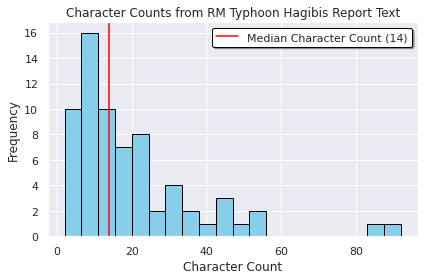

In [ ]:
char_count_rm = riskmap_df[CHAR_COUNT_COL_NAME]
plot_data_hist(
    char_count_rm,
    x_label,
    title = "Character Counts from RM Typhoon Hagibis Report Text"
)
plt.savefig(join(EDA_PLOTS_DIR, "character_hist_rm.png"))

In [ ]:
rm_skew = compute_distribution_skew(riskmap_df[CHAR_COUNT_COL_NAME])
print(f'Skewness for RM Typhoon Hagibis data {rm_skew}')

Skewness for RM Typhoon Hagibis data 2.010650744334077


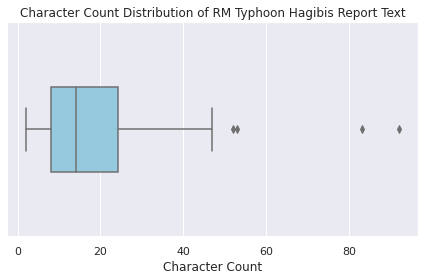

In [ ]:
plot_data_box_plot(
    char_count_rm,
    x_label,
    title = "Character Count Distribution of RM Typhoon Hagibis Report Text"
)
plt.savefig(join(EDA_PLOTS_DIR, "character_box_and_whisk_rm.png"))

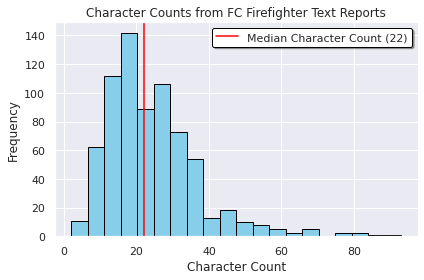

In [ ]:
char_count_fc = FC_data_df[CHAR_COUNT_COL_NAME]
plot_data_hist(
    char_count_fc,
    x_label,
    title = "Character Counts from FC Firefighter Text Reports"
)
plt.savefig(join(EDA_PLOTS_DIR, "character_hist_fc.png"))

In [ ]:
fc_skew = compute_distribution_skew(FC_data_df[CHAR_COUNT_COL_NAME])
print(f'Skewness for FC Firefighter Report data {fc_skew}')

Skewness for FC Firefighter Report data 1.5716327230632525


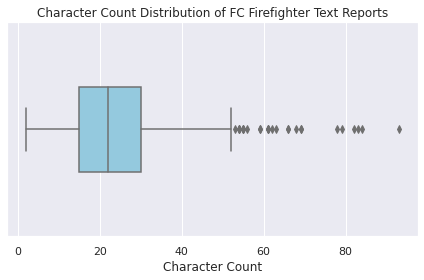

In [ ]:
plot_data_box_plot(
    char_count_fc,
    x_label,
    title = "Character Count Distribution of FC Firefighter Text Reports"
)
plt.savefig(join(EDA_PLOTS_DIR, "character_box_and_whisk_fc.png"))

In [ ]:
colors = ['skyblue', '#d291bc']

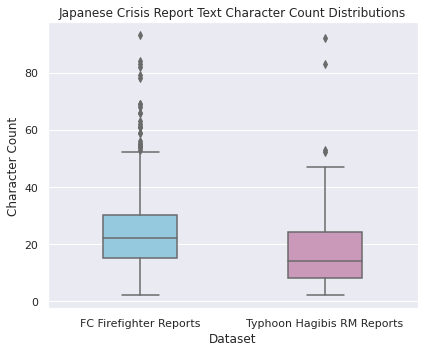

In [ ]:
plot_box_plot_data_comparison(
    [char_count_fc, char_count_rm],
    ["FC Firefighter Reports", "Typhoon Hagibis RM Reports"],
    'Character Count',
    title = "Japanese Crisis Report Text Character Count Distributions",
    colors_list = colors
)
plt.savefig(join(EDA_PLOTS_DIR, "character_box_and_whisk_fc_rm.png"))